<a href="https://colab.research.google.com/github/nair-jishnu/Twitter-Sentiment-Analysis/blob/master/PolaSent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [0]:
    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [5]:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="icyphox", count=100)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 100.

5 recent tweets:

@mustefaJ @firasd @garrytan looks like it's the latter
https://t.co/docGBqn8zC

RT @alexjackhughes: @icyphox @firasd @garrytan Nope - David from Hackernoon got in touch to say they were moving Hackernoon off Medium. If…

@alexjackhughes @firasd @garrytan ah interesting. that's great then. 
perhaps not everyone got that email (?)

@alexjackhughes @firasd @garrytan i'm guessing that's the email from Medium?

@firasd @garrytan this makes a ton of sense. HackerNoon can’t force its contributors to migrate along with them.



In [6]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,@mustefaJ @firasd @garrytan looks like it's th...
1,RT @alexjackhughes: @icyphox @firasd @garrytan...
2,@alexjackhughes @firasd @garrytan ah interesti...
3,@alexjackhughes @firasd @garrytan i'm guessing...
4,@firasd @garrytan this makes a ton of sense. H...
5,RT @sophiebits: &gt; aGkgdHdpd…\n\nme: I have ...
6,RT @LiveOverflow: Still thinking smart contrac...
7,RT @_ayoubfathi_: One liner to fetch all URLs ...
8,@N3rdyP3pp3r @unicode i recall reading somewhe...
9,RT @hopefulIe: There’s literally 5 movies on w...


In [7]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [8]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1105434573633015808
2019-03-12 11:45:14
Twitter for Android
2
0
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'mustefaJ', 'name': 'Mustefa ْجوشَن', 'id': 194357577, 'id_str': '194357577', 'indices': [0, 9]}, {'screen_name': 'firasd', 'name': 'Firas Durri', 'id': 6299142, 'id_str': '6299142', 'indices': [10, 17]}, {'screen_name': 'garrytan', 'name': 'Garry()', 'id': 11768582, 'id_str': '11768582', 'indices': [18, 27]}], 'urls': [{'url': 'https://t.co/docGBqn8zC', 'expanded_url': 'https://twitter.com/alexjackhughes/status/1105409578110500865?s=19', 'display_url': 'twitter.com/alexjackhughes…', 'indices': [55, 78]}]}


In [0]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [10]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,@mustefaJ @firasd @garrytan looks like it's th...,78,1105434573633015808,2019-03-12 11:45:14,Twitter for Android,2,0
1,RT @alexjackhughes: @icyphox @firasd @garrytan...,139,1105410462429020160,2019-03-12 10:09:26,Twitter for Android,0,1
2,@alexjackhughes @firasd @garrytan ah interesti...,109,1105409958869327872,2019-03-12 10:07:26,Twitter Web App,0,0
3,@alexjackhughes @firasd @garrytan i'm guessing...,76,1105407227261673472,2019-03-12 09:56:35,Twitter Web App,0,0
4,@firasd @garrytan this makes a ton of sense. H...,112,1105352498057900032,2019-03-12 06:19:06,Twitter for Android,6,1
5,RT @sophiebits: &gt; aGkgdHdpd…\n\nme: I have ...,108,1105343449694269440,2019-03-12 05:43:09,Twitter for Android,0,276
6,RT @LiveOverflow: Still thinking smart contrac...,139,1105074614911135744,2019-03-11 11:54:54,Twitter for Android,0,12
7,RT @_ayoubfathi_: One liner to fetch all URLs ...,140,1104729353470922752,2019-03-10 13:02:57,Twitter for Android,0,133
8,@N3rdyP3pp3r @unicode i recall reading somewhe...,115,1104711676593463297,2019-03-10 11:52:42,Twitter for Android,0,0
9,RT @hopefulIe: There’s literally 5 movies on w...,91,1104343268056129537,2019-03-09 11:28:47,Twitter for Android,0,115436


In [11]:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 80.95


In [12]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
wooot we met @Yassineaboukir https://t.co/yRopGj4afW
Number of likes: 11
52 characters.

The tweet with more retweets is: 
RT @hopefulIe: There’s literally 5 movies on why this is a bad idea https://t.co/7NgYHA8RWD
Number of retweets: 115436
91 characters.



In [0]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

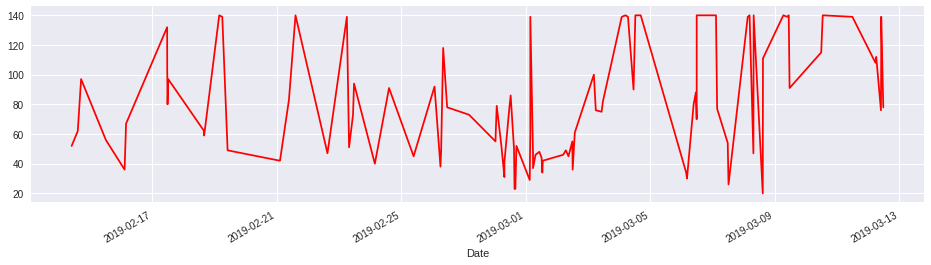

In [14]:
tlen.plot(figsize=(16,4), color='r');

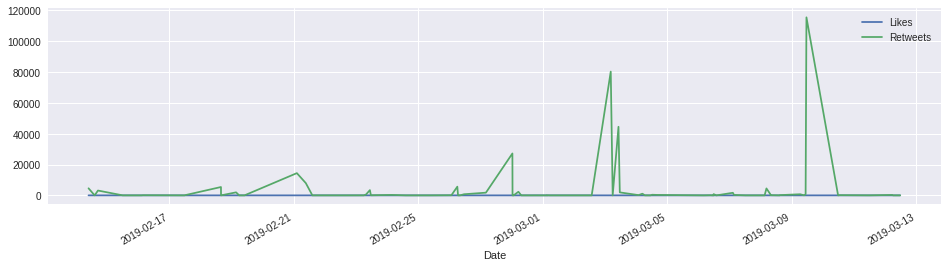

In [15]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [16]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter Web App


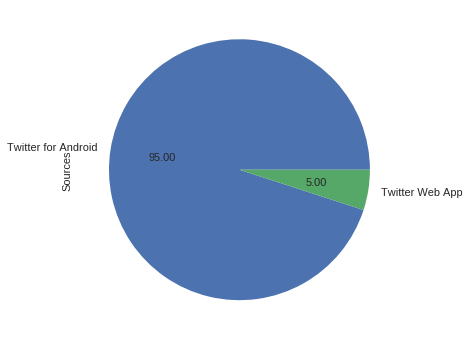

In [17]:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [0]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [19]:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,@mustefaJ @firasd @garrytan looks like it's th...,78,1105434573633015808,2019-03-12 11:45:14,Twitter for Android,2,0,0
1,RT @alexjackhughes: @icyphox @firasd @garrytan...,139,1105410462429020160,2019-03-12 10:09:26,Twitter for Android,0,1,0
2,@alexjackhughes @firasd @garrytan ah interesti...,109,1105409958869327872,2019-03-12 10:07:26,Twitter Web App,0,0,1
3,@alexjackhughes @firasd @garrytan i'm guessing...,76,1105407227261673472,2019-03-12 09:56:35,Twitter Web App,0,0,0
4,@firasd @garrytan this makes a ton of sense. H...,112,1105352498057900032,2019-03-12 06:19:06,Twitter for Android,6,1,0
5,RT @sophiebits: &gt; aGkgdHdpd…\n\nme: I have ...,108,1105343449694269440,2019-03-12 05:43:09,Twitter for Android,0,276,-1
6,RT @LiveOverflow: Still thinking smart contrac...,139,1105074614911135744,2019-03-11 11:54:54,Twitter for Android,0,12,1
7,RT @_ayoubfathi_: One liner to fetch all URLs ...,140,1104729353470922752,2019-03-10 13:02:57,Twitter for Android,0,133,0
8,@N3rdyP3pp3r @unicode i recall reading somewhe...,115,1104711676593463297,2019-03-10 11:52:42,Twitter for Android,0,0,1
9,RT @hopefulIe: There’s literally 5 movies on w...,91,1104343268056129537,2019-03-09 11:28:47,Twitter for Android,0,115436,-1


In [0]:
p_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
n_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
ng_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [27]:
print("Percentage of positive tweets: {}%".format(len(p_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(n_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(ng_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 28.0%
Percentage of neutral tweets: 60.0%
Percentage of negative tweets: 12.0%
